# Cathegories statistics

In [105]:
import numpy as np
import pandas as pd
from pathlib import Path
import collections
import matplotlib.pyplot as plt

In [82]:
df = pd.DataFrame(columns=["name","weight","folder","N"])
i = 0
for path in Path('cathegories/cathegorical').rglob('*.txt'):
        kat = pd.read_csv(path, header=None)
        name = path.name.split(".")[0]
        weight = int(kat.iloc[0,0][2:])
        folder = path.parts[-2]
        count = kat.shape[0]-1
        df.loc[i] = [name, weight, folder, count]
        i += 1

## Pstwa wylosowania danej podkategorii

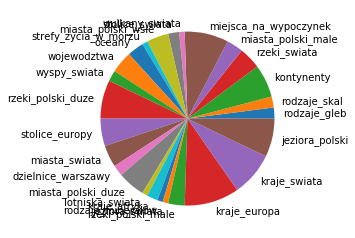

In [67]:
df_plot = df[df.folder=="geography"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

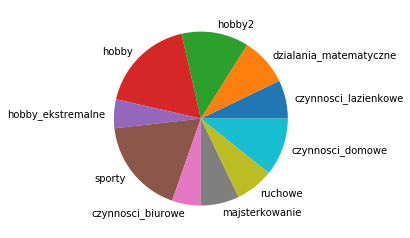

In [68]:
df_plot = df[df.folder=="activities"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

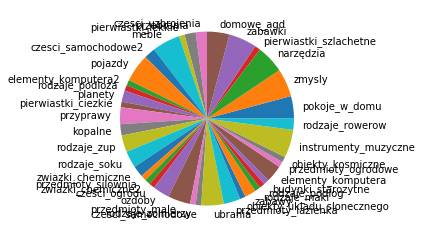

In [69]:
df_plot = df[df.folder=="items"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

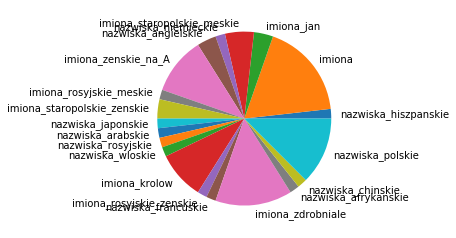

In [70]:
df_plot = df[df.folder=="names"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

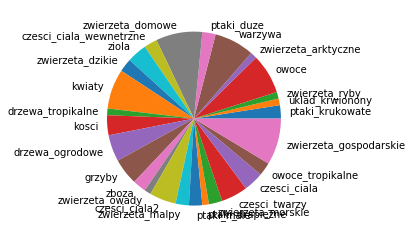

In [71]:
df_plot = df[df.folder=="nature"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

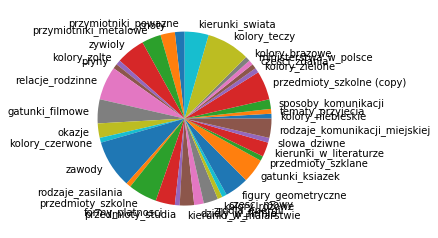

In [72]:
df_plot = df[df.folder=="other_concepts"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

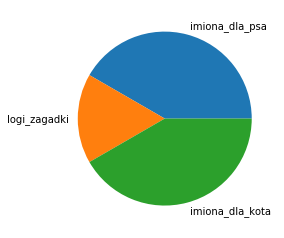

In [73]:
df_plot = df[df.folder=="special_names"]
plt.pie(df_plot.weight, labels=df_plot.name)
plt.show()

# Rozkład liczności danych podkategorii

In [74]:
min(df.N)

5

In [75]:
max(df.N)

682

In [78]:
sum(df.N)

3495

In [47]:
df.shape

(162, 4)

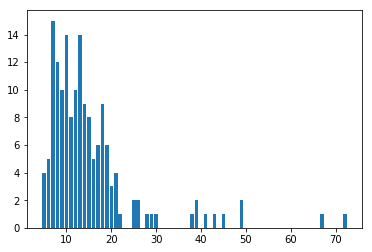

In [65]:
df_plot = df.groupby(df.N).count().iloc[:-2,0]
plt.bar(df_plot.index, df_plot)
plt.show()

## Czy dane słowo już gdzieś występuje?

In [95]:
szukane_slowo = "Tom"

found = []
for path in Path('cathegories/cathegorical').rglob('*.txt'):
        kat = pd.read_csv(path, header=None)
        if szukane_slowo in list(kat.iloc[1:,0]):
            found.append(path.name.split(".")[0])
if len(found)>0:
    print("Słowo występuje już w: ", found)
else:
    print("Słowo nie występuje jeszcze w zbiorze.")

Słowo występuje już w:  ['imiona_dla_kota']


## Czy w którejś podkategorii powtarzają się słowa?

In [107]:
found = []
for path in Path('cathegories/cathegorical').rglob('*.txt'):
        kat = pd.read_csv(path, header=None).iloc[1:,0]
        if len(list(kat)) != len(set(kat)):
            found.append(path.name.split(".")[0])
            print([item for item, count in collections.Counter(list(kat)).items() if count > 1])
if len(found)>0:
    print("Znaleziono powtarzające się słowa w: ", found)
else:
    print("Nie znaleziono nigdzie powtarzających się słów.")

Nie znaleziono nigdzie powtarzających się słów.
